# **Lab 3 (b)**
### Weightage 3.6%
# Convolutional Neural Networks
---
Dataset used: Cats Vs. Dogs

---



Maximum Points in the Lab: 90

---
Important points to remember :


1.  Observations for the experiments should be explained.
2. All the code should be submitted in the form of a single Jupyter notebook itself.
3. Points for each sub-section are mentioned in the appropriate question.
4. Make sure to begin early as a few experiments may consume more time to run.
5. You can use Google colab to run in jupyter notebook (https://colab.research.google.com/) How to load data in Google Colab ?(https://towardsdatascience.com/3-ways-to-load-csv-files-into-colab-7c14fcbdcb92)
6. The lab must be submitted on Google classroom. The code as well as the accompanying observations should be made part of the python notebook.
7. **Code Readability** is very important. Hence use self explanatory variable names and add comments to describe your approach wherever necessary.
8. You are expected to submit your **detailed inferences** and not just an error free code.
9. The lab is due on **March 20th 11.59pm**.
10. The lab should be completed **individually**. Students are expected to follow the **honor code** of the class.




In this part of your Lab 3, you will be using Convolutional Neural Network to classify whether a given image contains a Cat or a Dog. You can use the tensorflow package for this implementation. The Cats and Dogs dataset from the famous Kaggle contest which is filtered and available at tensorflow can be used.

In [0]:
# Import the necessary libraries

import tensorflow as tf
import numpy as np
import cv2
import matplotlib.pyplot as plt
import os
import shutil
import random
from sklearn.metrics import confusion_matrix

# If using Google Colab, use the following package to display the image
# If running on your local system, cv2.imshow shall work fine
# If running on your local system please comment the line below
from google.colab.patches import cv2_imshow

# Data loading and Preprocessing

---


The following blocks downloads the dataset stored at tensorflow and extracts them to be used to train the CNN model. **Please don't make any changes to these blocks below.**

In [2]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'
path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract = True)
PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

68608000/68606236 [==============================] - 0s 0us/step


The dataset has the following directory structure:

<pre>
<b>cats_and_dogs_filtered</b>
|__ <b>train</b>
    |______ <b>cats</b>: [cat.0.jpg, cat.1.jpg, cat.2.jpg ....]
    |______ <b>dogs</b>: [dog.0.jpg, dog.1.jpg, dog.2.jpg ...]
|__ <b>validation</b>
    |______ <b>cats</b>: [cat.2000.jpg, cat.2001.jpg, cat.2002.jpg ....]
    |______ <b>dogs</b>: [dog.2000.jpg, dog.2001.jpg, dog.2002.jpg ...]
</pre>

Extract the paths of these directories onto different variables to facilitate accessing the dataset and thereby training the model.

In [0]:
train_dir_path = os.path.join(PATH, 'train')
validation_dir_path = os.path.join(PATH, 'validation')

train_cats_dir_path = os.path.join(train_dir_path, 'cats')  
train_dogs_dir_path = os.path.join(train_dir_path, 'dogs') 
validation_cats_dir_path = os.path.join(validation_dir_path, 'cats')  
validation_dogs_dir_path = os.path.join(validation_dir_path, 'dogs')  

## Create a labelled test set from the validation set
As you would have seen we have only training and validation sets with labels as the ground truth labels for the Kaggle contest test set images is not public. Hence we shall consider 10% of validation data (5% Cats, 5% Dogs)  as our test set. 


In [0]:
# Create a test directory with the same Cats and Dogs sub directory structure 
test_dir_path = os.path.join(PATH, 'labelled_test')
if not  os.path.exists(test_dir_path):
    os.makedirs(test_dir_path)
test_cats_dir_path = os.path.join(test_dir_path,'cats')
test_dogs_dir_path = os.path.join(test_dir_path,'dogs')
if not os.path.exists(test_cats_dir_path):
    os.makedirs(test_cats_dir_path)
if not os.path.exists(test_dogs_dir_path):
    os.makedirs(test_dogs_dir_path)

# Randomly pick 5% of validation Cat Images 
val_cat_list = os.listdir(validation_cats_dir_path)
num_cat_test_files = int(0.05 * len(val_cat_list))
chosen_cats = random.sample(val_cat_list,num_cat_test_files)

# Randomly pick 5% of validation Dog Images 
val_dog_list = os.listdir(validation_dogs_dir_path)
num_dog_test_files = int(0.05 * len(val_dog_list))
chosen_dogs = random.sample(val_dog_list,num_dog_test_files)

# Move the selected Cat Images from Validation Cats directory to Test Cats directory 
for cat in chosen_cats:
    src_path = os.path.join(validation_cats_dir_path,cat)
    if not os.path.exists(os.path.join(test_cats_dir_path,cat)):
        shutil.move(src_path,test_cats_dir_path)

# Move the selected Dog Images from Validation Dogs directory to Test Dogs directory 
for dog in chosen_dogs:
    src_path = os.path.join(validation_dogs_dir_path,dog)
    if not os.path.exists(os.path.join(test_dogs_dir_path,dog)):
        shutil.move(src_path,test_dogs_dir_path)  


In [0]:
num_cats_train =  len(os.listdir(train_cats_dir_path))
num_dogs_train =  len(os.listdir(train_dogs_dir_path))
num_cats_val =  len(os.listdir(validation_cats_dir_path))
num_dogs_val =  len(os.listdir(validation_dogs_dir_path))
num_cats_test =  len(os.listdir(test_cats_dir_path))
num_dogs_test =  len(os.listdir(test_dogs_dir_path))

total_train_data = num_cats_train + num_dogs_train
total_val_data = num_cats_val + num_dogs_val
total_test_data = num_cats_test + num_dogs_test

The images are of different sizes, but our machine learning model requires input images to be of a fixed size. Let us decide an input size 200 x 200.

In [0]:
IMG_HEIGHT = 200
IMG_WIDTH = 200

# Generate Image Batches


---


As images are high dimensional, fitting the model on entire training set may be memory and computation inefficient. Hence we generate batches of images to be processed by the model. `ImageDataGenerator` class in tensorflow facilitates this. 

Describe the various arguments in the instantiation of `tensorflow.keras.preprocessing.image.ImageDataGenerator` object.


---

**5 Points**

---

* `featurewise_center`: To set input mean zero over dataset
* `featurewise_std_normalization`: To divide input by std of dataset
* `samplewise_center`: To set input mean zero over each sample
* `samplewise_std_normalization`: To divide input by its std
* `rotation_range`: Degree of random rotations
* `width_shift_range`: Range of width shift
* `height_shift_range`: Range of height shift
* `brightness_range`: Range for picking brightness
* `shear_range`: Range of shear intensity
* `zoom_range`: Range of zoom
* `fill_mode`: Fill points outside boundaries based on value
* `horizontal_flip`: Randomly flip horizontally
* `vertical_flip`: Randomly flip vertically

---




Describe the arguments of `flow_from_directory()` method of the `tensorflow.keras.preprocessing.image.ImageDataGenerator` object. 

---

**5 Points**

---

* `directory`: Path to directory
* `target_size`: Size in terms of width and height to which images should be resized
* `color_mode`: To convert images into grayscale, rgb or rgba
* `batch_size`: Size of data
* `seed`: Random seed 
* `shuffle`: Bool, Whether to shuffle the data
* `interpolation`: Interpolation method to resample image
* `class_mode`: Determines the type of label arrays returned 
* `save_to_dir`: To save the augmented images
* `save_prefix`: Prefix used while saving the image

---

Create a function that returns a generator object which shall fetch batches of images from the specified directory. This function shall be reused for fetching images from train, validation or test directories.



---

**5 Points**


---




In [0]:
def get_generator(directory_path, batch_size_):
    data_gen = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255
    )
    
    data_batch_generator = data_gen.flow_from_directory(
        directory = directory_path,
        target_size = (IMG_HEIGHT, IMG_WIDTH),
        batch_size=batch_size_,
        class_mode="binary",
        shuffle = True,
        seed = 107
    )


    return data_batch_generator

Describe the arguments for the following functions callable on a `tensorflow.keras.Sequential` model object :

1. add() **[5 Points]**

> It adds a layer on top of layer stack

* `layer`: Adds a layer instance

---

2. compile() **[5 Points]**

> It configures the model for training

* `optimizer`: optimizer instance
* `loss`: string or objective function instance for loss
* `metrics`: list of metrics to be evaluated by the model during training and testing, like *accuracy*
* `loss_weights`: list or dictionary specifying scalar coefficients
* `sample_weight_mode`: to do timestep-wise sample weighting. If model has multiple outputs, by passing a dict we can use this parameter differently for each output
* `weighted_metrics`: list of metrics to be evaluated and weighted by sample_weight or class_weight
* `target_tensors`: to use our own tensor targets
* `**kwargs`: any additional args

---

3. fit() **[5 Points]**

> Trains the model for a fixed number of epochs

* `x`: input data
* `y`: target data
* `batch_size`: number of samples before gradient update
* `epochs`: number of iterations to train the model
* `verbose`: verbosity mode
* `callbacks`: list of callback ins for training 
* `validation_split`: fraction of data used as validation data
* `validation_data`: data to evaluate loss after end of epoch
* `shuffle`: whether to shuffle the training data before each epoch
* `class_weight`: dict for weighing the loss func
* `initial_epoch`: epoch at which start the training 
* `steps_per_epoch`: number of steps before declaring one epoch is complete
* `max_queue_size`: maximum size of generator queue 
* `use_multiprocessing`: use process based threading or not
* `**kwargs`: for backwards compatibility

---

4. predict()  **[5 Points]**

> Generates output for the input samples

* `x`: Input samples
* `batch_size`: number of samples per gradient update
* `verbose`: Verbosity mode
* `steps`: number of steps before declaring the prediction round is over
* `callbacks`: list of callback durng prediction
* `max_queue_size`: max size of generator queue
* `workers`: maximum number of threads while multiprocessing
* `use_multiprocessing`: use process based threading or not

---


Describe the arguments used when instantiating the following `tensorflow.keras.layers` :
1. Conv2D() **[5 Points]**

> This layer creates a convolution kernel that is convolved with the layer input to produce a tensor of outputs.

* `filters`: dimension of the output space
* `kernel_size`: height and width of 2D convolution window
* `strides`: strides of the convolution by the height and weight
* `padding`: *valid* or *same*
* `data_format`: ordering of the dimensions of input
* `dilation_rate`: rate of dilation for dilated conv
* `activation`: activation func to use
* `use_bias`: whether use or not bias in layer
* `kernel_initializer`: initializer for kernel weights
* `bias_initializer`: initializer for bias vector
* `kernel_regularizer`: regularizer function applied to the kernel weights matrix
* `bias_regularizer`: regularization func for bias 
* `activity_regularizer`: regularization function applied to the output of the layer
* `kernel_constraint`: constraints for kernel weights
* `bias_constraint`: constraints for bias vector

---

2. MaxPooling2D() **[5 Points]**

> Max pooling operation for spatial data.

* `pool_size`: factor of downscaling
* `strides`: strides of the convolution by the height and weight
* `padding`: *valid* or *same*
* `data_format`: ordering of the dimensions of input


---

3. Flatten()  **[5 Points]**

> Flattens the input

* `data_format`: ordering of the dimensions in the inputs (*A string*)

---

4. Dense()  **[5 Points]**

> Just a regular densely-connected NN layer

* `units`: dimentionality of output
* `activation`: activation func to use
* `use_bias`: whether use or not bias in layer
* `kernel_initializer`: initializer for kernel weights
* `bias_initializer`: initializer for bias vector
* `kernel_regularizer`: regularizer function applied to the kernel weights matrix
* `bias_regularizer`: regularization func for bias 
* `activity_regularizer`: regularization function applied to the output of the layer
* `kernel_constraint`: constraints for kernel weights
* `bias_constraint`: constraints for bias vector

---

5. Dropout() **[5 Points]**

> Applies Dropout to the input

* `rate`: fraction of the input units to drop
* `noise_shape`: shape for binary dropout mask that will be multiplied with the input
* `seed`: random seed

---


# Defining the model architecture

---



We have defined our CNN model architecture here. **Please dont make any changes to the two blocks below.**

In [0]:
def build_cnn_model(dropout_probability = 0):
    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_HEIGHT,IMG_WIDTH, 3)))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(tf.keras.layers.MaxPooling2D((2, 2)))
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dropout(dropout_probability))
    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [0]:
#  Variables needed for subsequent sections

num_epochs = 5
# In binary mode cat is encoded as 0 and dog as 1. The below list shall be used to decode in order to get a human readable label.
labels = ["Cat","Dog"] 

# Best Batch size determination

---



Now we are ready to start working with the model. The hyperparameters we would like you to experiment are batch size and dropout probability. We shall start with the  experimentation of **batch size**. Discuss the impact of batch size on model training and performance.


---
**5 Points**


---




In [10]:
def determine_best_batch_size():
    batch_sizes = [16,32,64]
    avg_val_accuracies = []

    # Insert your code here to build a CNN model with the default dropout probability
    model = build_cnn_model()

    for bsize in batch_sizes:
        
        # Insert your code here to get generators that fetch batches from train and validation directories as per current batch size
        training_generator = get_generator(train_dir_path, bsize)
        validation_generator = get_generator(validation_dir_path, bsize)
        
        # Insert your code here to train the CNN model using the training set and validate using the validation set
        history = model.fit_generator(generator = training_generator,
                validation_data = validation_generator,
                epochs = num_epochs,
                shuffle = True,
                steps_per_epoch = 3 * total_train_data // bsize,
                validation_steps = total_val_data // bsize
                )
        
        # Insert your code here to find the average validation accuracy for this model setting and append it to the maintained list
        val_accuracy_list = history.history['val_accuracy']
        avg_accuracy = sum(val_accuracy_list) / len(val_accuracy_list)
        avg_val_accuracies.append(avg_accuracy)
        
    
    # Insert your code here to figure out the batch size which gives the highest average validation accuracy. Print the value and return it.
    print(avg_val_accuracies)
    maxAccuracyBatch = batch_sizes[avg_val_accuracies.index(max(avg_val_accuracies))]
    print (f"The best batch size is {maxAccuracyBatch}" )
    return maxAccuracyBatch

# determine_best_batch_size() is being called here
best_batch_size = determine_best_batch_size()

Found 2000 images belonging to 2 classes.
Found 950 images belonging to 2 classes.
Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/5
375/375 [==============================] - 25s 66ms/step - loss: 0.6859 - accuracy: 0.5440 - val_loss: 0.6767 - val_accuracy: 0.5318
Epoch 2/5
375/375 [==============================] - 24s 65ms/step - loss: 0.6586 - accuracy: 0.6013 - val_loss: 0.6351 - val_accuracy: 0.6271
Epoch 3/5
375/375 [==============================] - 25s 66ms/step - loss: 0.6196 - accuracy: 0.6507 - val_loss: 0.6121 - val_accuracy: 0.6621
Epoch 4/5
375/375 [==============================] - 24s 65ms/step - loss: 0.5673 - accuracy: 0.7083 - val_loss: 0.5848 - val_accuracy: 0.6822
Epoch 5/5
375/375 [==============================] - 24s 64ms/step - loss: 0.5023 - accuracy: 0.7518 - val_loss: 0.6836 - val_accuracy: 0.6515
Found 2000 images belonging to 2 classes.
Found 950 images belonging to 2 classes.
Epoch 1/5
187/187 [========================

**Observations:** Batch size determine the number of samples before gradient update. As we can see, bigger batch size results in better accuracy. So we get final 64 batch size.

Also, larger batch size would too result in less accuracy.

# Best Dropout Probability determination

---


Use the best batch size determined in the previous section for the subsequent sections. We shall now do experimentation of **dropout probability** parameter. Discuss the impact of dropout probability on model performance.


---
**5 Points**


---


In [21]:
def determine_best_dropout_probability():
    dropout_probs = [0,0.25,0.5,0.75]
    avg_val_accuracies = []


    # Insert your code here to get generators that fetch batches from train and validation directories as per best batch size
    training_generator = get_generator(train_dir_path, best_batch_size)
    validation_generator = get_generator(validation_dir_path, best_batch_size)

    for prob in dropout_probs:
        
        
        # Insert your code here to build a CNN model with the current dropout probability
        model = build_cnn_model(dropout_probability = prob)

        # Insert your code here to train the CNN model using the training set and validate using the validation set
        history = model.fit_generator(generator = training_generator,
                validation_data = validation_generator,
                epochs = num_epochs,
                steps_per_epoch = 3 * total_train_data // best_batch_size,
                validation_steps = total_val_data // best_batch_size
                )

       
        # Insert your code here to find average validation accuracy for this model setting and append it to the maintained list
        val_accuracy_list = history.history['val_accuracy']
        avg_accuracy = sum(val_accuracy_list) / len(val_accuracy_list)
        avg_val_accuracies.append(avg_accuracy)


    # Insert your code here to figure out the dropout probability which gives the highest average validation accuracy. Print the value and return it.
    print(avg_val_accuracies)
    maxAccuracyProb = dropout_probs[avg_val_accuracies.index(max(avg_val_accuracies))]
    print (f"The best dropout probability is {maxAccuracyProb}" )
    return maxAccuracyProb



    
# determine_best_dropout_probability() is being called here
best_prob = determine_best_dropout_probability()

Found 2000 images belonging to 2 classes.
Found 950 images belonging to 2 classes.
Epoch 1/5
93/93 [==============================] - 23s 245ms/step - loss: 0.6898 - accuracy: 0.5314 - val_loss: 0.6894 - val_accuracy: 0.5033
Epoch 2/5
93/93 [==============================] - 22s 240ms/step - loss: 0.6803 - accuracy: 0.5782 - val_loss: 0.6716 - val_accuracy: 0.5759
Epoch 3/5
93/93 [==============================] - 22s 240ms/step - loss: 0.6703 - accuracy: 0.5987 - val_loss: 0.6604 - val_accuracy: 0.5971
Epoch 4/5
93/93 [==============================] - 22s 240ms/step - loss: 0.6624 - accuracy: 0.6055 - val_loss: 0.6664 - val_accuracy: 0.5480
Epoch 5/5
93/93 [==============================] - 22s 238ms/step - loss: 0.6502 - accuracy: 0.6241 - val_loss: 0.6431 - val_accuracy: 0.6105
Epoch 1/5
93/93 [==============================] - 22s 239ms/step - loss: 0.6871 - accuracy: 0.5451 - val_loss: 0.6797 - val_accuracy: 0.5614
Epoch 2/5
93/93 [==============================] - 22s 241ms/step

**Observations**: Dropout gives us the probability of dropping a node. It allows to learn a good model, with less lazy node. A good drouput rate is between 0.5 to 0.8, we get dropout rate of 0.75.

# Images Visualization

---


Now we shall train our CNN model with best hyperparameters. As a first step we need to plot images to have visual understanding of the data. This image visualization shall be reused. Hence create a custom **function to visualize images**.


---
**2 Points**


---




In [0]:
def visualize_image(img):
    # Insert your code here to visualize a given image
    cv2_imshow(img*255)
    

# Make generators ready

---

Create generators to fetch batches from train, test and validation directories. You may use best batch size determined earlier.



---
**3 Points**


---




In [23]:
# Insert your code here to create generators that fetch batches of size best_batch_size (determined earlier) from train, validation and test directories
training_generator = get_generator(train_dir_path, best_batch_size)
validation_generator = get_generator(validation_dir_path, best_batch_size)
test_generator = get_generator(test_dir_path, best_batch_size)


Found 2000 images belonging to 2 classes.
Found 950 images belonging to 2 classes.
Found 50 images belonging to 2 classes.


# Visualize training images

---

To get an understanding of the data fetch a training batch and visualize any 5 training images along with their labels. 



---

**Note**: In binary mode, ImageDataGenerator encodes Cats as 0 and Dogs as 1.

---




---

**2 Points**

---



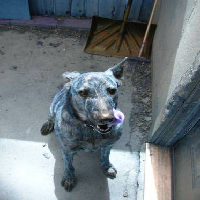

Its label is Dog


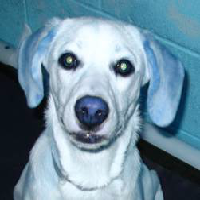

Its label is Dog


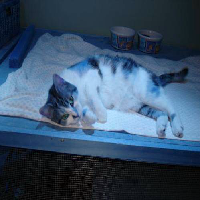

Its label is Cat


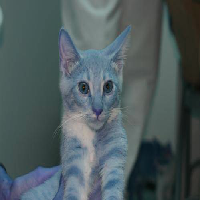

Its label is Cat


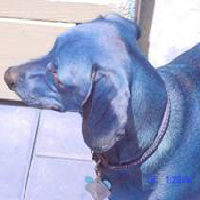

Its label is Dog


In [24]:
# Insert your code here to obtain a sample training images batch from the train directory generator
images, target = next(training_generator)

for i in range(5):
    # Insert your code here to visualize the training images
    visualize_image(images[i])
    
    # Insert your code here to print corresponding training label: Cat / Dog
    print(f"Its label is {labels[int(target[i])]}")

    

# Build Model

---
Now build the model as per the best dropout probability value determined earlier. Summarize the model architecture.

---

**2 Points**

---




In [39]:
# Insert your code here to build the CNN model as per the best dropout probability value determined earlier
final_model = build_cnn_model(dropout_probability = best_prob)

# Insert your code here to print the model summary
print(final_model.summary())


Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_36 (Conv2D)           (None, 198, 198, 32)      896       
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 99, 99, 32)        0         
_________________________________________________________________
conv2d_37 (Conv2D)           (None, 97, 97, 64)        18496     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_38 (Conv2D)           (None, 46, 46, 128)       73856     
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 23, 23, 128)       0         
_________________________________________________________________
flatten_12 (Flatten)         (None, 67712)           

# Training the Model

---
Train the model built with best hyperparameter settings. Generate a **Plot** of Epochs Vs. training and validation accuracy. Also generate a similar plot for training and validation loss. Discuss your **inferences** from the plot.


---

**7 Points**


---



In [40]:
# Insert your code here to train the CNN model with best hyperparameter settings using training set and validate using the validation set (1 Point)
history = final_model.fit_generator(generator = training_generator,
                validation_data = validation_generator,
                epochs = num_epochs,
                steps_per_epoch = 3 * total_train_data // best_batch_size,
                validation_steps = total_val_data // best_batch_size
                )

Epoch 1/5
93/93 [==============================] - 24s 253ms/step - loss: 0.6960 - accuracy: 0.5015 - val_loss: 0.6905 - val_accuracy: 0.5167
Epoch 2/5
93/93 [==============================] - 24s 253ms/step - loss: 0.6910 - accuracy: 0.5288 - val_loss: 0.6877 - val_accuracy: 0.5759
Epoch 3/5
93/93 [==============================] - 23s 247ms/step - loss: 0.6882 - accuracy: 0.5394 - val_loss: 0.6869 - val_accuracy: 0.5938
Epoch 4/5
93/93 [==============================] - 23s 242ms/step - loss: 0.6859 - accuracy: 0.5530 - val_loss: 0.6824 - val_accuracy: 0.6071
Epoch 5/5
93/93 [==============================] - 23s 243ms/step - loss: 0.6802 - accuracy: 0.5715 - val_loss: 0.6778 - val_accuracy: 0.5904


In [0]:
# Insert your code here to obtain the lists: epochs, training accuracy, validation accuracy, training loss, validation loss (2 Points)
epochs = range(1, num_epochs+1)
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']
training_loss = history.history['loss']
validation_loss = history.history['val_loss']

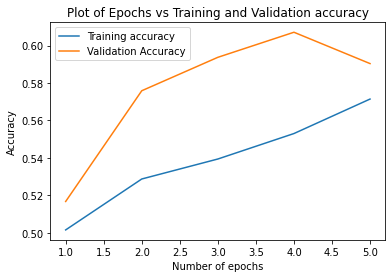

In [42]:
# Insert your code here to plot Epochs Vs. training and validation accuracy (2 Points)
plt.plot(epochs, training_accuracy, label = "Training accuracy")
plt.plot(epochs, validation_accuracy, label = "Validation Accuracy")
plt.xlabel('Number of epochs')
plt.ylabel('Accuracy')
plt.title('Plot of Epochs vs Training and Validation accuracy')
plt.legend()
plt.show()


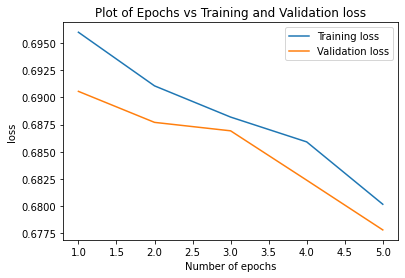

In [43]:
# Insert your code here to plot Epochs Vs. training and validation loss (2 Points)
plt.plot(epochs, training_loss, label = "Training loss")
plt.plot(epochs, validation_loss, label = "Validation loss")
plt.xlabel('Number of epochs')
plt.ylabel('loss')
plt.title('Plot of Epochs vs Training and Validation loss')
plt.legend()
plt.show()


**Observations:** We can see, while training, with each epoch the loss is decreasing and accuracy is increasing. In case of validation, the accuracy increases first, but then, it decreases. This is probably because of overfitting.

# Prediction

---
Fetch a sample test batch and determine the model's predictions on this batch of test images. Generate a confusion matrix and comment on the prediction statistics.



---

**Note**: Predictions would return the probability of the image belonging to class 1 (Dog). If this value is more than 0.5, assign class 1 (Dog) as the prediction. Else, assign class 0(Cat) as the prediction.

---
**2 Points**

---





In [30]:
# Insert your code here to obtain a sample test images batch from the test directory generator
Xtest_batch, Ytest_batch = next(test_generator)

# Insert your code here to get the model's prediction probabilities
predicted_target = final_model.predict(Xtest_batch)

# Insert your code here to assign class label based on prediction probabilities
predicted_target = np.where(predicted_target <= 0.5, 'Cat', 'Dog').reshape((len(predicted_target), ))
Ytest_batch = np.where(Ytest_batch == 0, 'Cat', 'Dog')
# Insert your code here to print the confusion matrix.
matrix = confusion_matrix(Ytest_batch, predicted_target, labels=['Cat', 'Dog'])
print(matrix)

[[14 11]
 [ 8 17]]


Discuss the **inferences** you obtained from the confusion matrix.


---

**2 Points**


---
The model is predicting dogs more. It has predicted 14 cats correctly and 11 cats wrongly. In case of dogs, it has guessed 17 dogs correctly and 8 wrongly. The accuracy is 62 % which is almost same as the validation accuracy of the model.

